<a href="https://colab.research.google.com/github/putraaryawinata/Prosthetics-Project/blob/master/BionicLeg_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library and Dataset, as well as Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
tf.__version__

'2.8.0'

In [4]:
dataset = pd.read_csv("data_sensor_angle10mei22#1(naikTangga).csv", delimiter=";")
x = dataset.iloc[:, 1:-2].values
y = dataset.iloc[:, -1].values

In [151]:
print(len(x_test))
print(y[0])

871
12


# Split Dataset

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

# Build ANN Regression Model

In [160]:
bionicleg_model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=25, activation='sigmoid'),
                                              tf.keras.layers.Dropout(0.2),
                                              tf.keras.layers.Dense(units=25, activation='relu'),
                                              tf.keras.layers.Dense(units=1, activation='relu'),
])

## Compile and Train

In [124]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mean_squared_error') < 250:
            print("\nReached optimum")
            self.model.stop_training = True

In [125]:
callbacks = myCallback()

In [161]:
bionicleg_model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

In [162]:
history = bionicleg_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 50, epochs = 500)

Epoch 1/500
41/41 [==============================] - 1s 8ms/step - loss: 1223.9569 - mae: 28.8554 - val_loss: 1151.7323 - val_mae: 27.6325
Epoch 2/500
41/41 [==============================] - 0s 4ms/step - loss: 1071.6798 - mae: 26.1026 - val_loss: 938.4384 - val_mae: 23.5214
Epoch 3/500
41/41 [==============================] - 0s 4ms/step - loss: 833.0067 - mae: 21.1241 - val_loss: 700.3096 - val_mae: 18.2839
Epoch 4/500
41/41 [==============================] - 0s 4ms/step - loss: 618.3190 - mae: 16.6999 - val_loss: 522.3587 - val_mae: 14.9466
Epoch 5/500
41/41 [==============================] - 0s 5ms/step - loss: 473.0651 - mae: 14.6252 - val_loss: 418.8394 - val_mae: 14.4577
Epoch 6/500
41/41 [==============================] - 0s 5ms/step - loss: 415.5974 - mae: 14.7214 - val_loss: 395.5990 - val_mae: 15.0634
Epoch 7/500
41/41 [==============================] - 0s 5ms/step - loss: 399.9020 - mae: 14.9146 - val_loss: 392.6371 - val_mae: 15.2325
Epoch 8/500
41/41 [===================

In [ ]:
print(type(model))

<class 'keras.engine.sequential.Sequential'>


In [166]:
y_pred = model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)[23])

[32.94 31.  ]


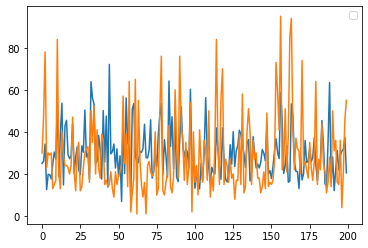

In [164]:
plt.plot(y_pred.reshape(871)[:200])
plt.plot(y_test[:200])
plt.legend()
plt.show()

In [ ]:
loss_bionic = history.history['loss']

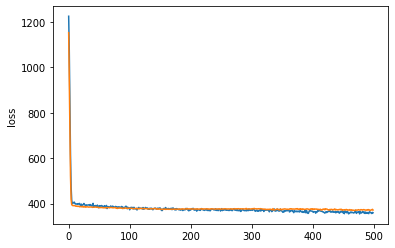

In [165]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.show()

In [ ]:
print(history.history['loss'])

[371.1689147949219, 336.75665283203125, 315.0721435546875, 327.4476013183594, 337.4746398925781, 314.23370361328125, 321.65789794921875, 313.8862609863281, 330.90771484375, 318.0680236816406, 314.550537109375, 321.11016845703125, 311.00006103515625, 319.4200744628906, 316.0352783203125, 313.8946228027344, 312.8369140625, 313.7811279296875, 311.6192932128906, 309.79437255859375, 311.79766845703125, 318.6474304199219, 323.3286437988281, 318.0885314941406, 304.5882568359375, 311.77362060546875, 322.0461730957031, 317.12255859375, 312.4602355957031, 309.3897399902344, 318.5136413574219, 318.86322021484375, 308.5619201660156, 303.0907287597656, 309.8624572753906, 346.0649719238281, 314.9317932128906, 312.0343322753906, 307.4399719238281, 309.42236328125, 316.0959167480469, 316.4472351074219, 307.7037658691406, 322.2525634765625, 306.85821533203125, 304.0585632324219, 298.8046875, 308.2872314453125, 315.4931640625, 301.5093688964844, 312.7381591796875, 311.754150390625, 330.9692077636719, 30

In [ ]:
a = model.predict(x_test[:20])

print(a)
real = y_test[:20].reshape(20,1)
print(len(real))
print(np.concatenate((a,y_test[:20]), axis=1))

In [141]:
bionicleg_model.save("bionicleg_model1")

INFO:tensorflow:Assets written to: bionicleg_model/assets


In [167]:
# EXERCISE: Use the tf.saved_model API to save your model in the SavedModel format. 
export_dir = 'saved_model/2'

# YOUR CODE HERE
tf.saved_model.save(bionicleg_model, export_dir)

INFO:tensorflow:Assets written to: saved_model/2/assets


INFO:tensorflow:Assets written to: saved_model/2/assets


In [168]:
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [169]:
# EXERCISE: Use the TFLiteConverter SavedModel API to initialize the converter

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir) # YOUR CODE HERE

# Set the optimzations
converter.optimizations = [optimization] # YOUR CODE HERE

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert() # YOUR CODE HERE

In [170]:
import pathlib

tflite_model_file = pathlib.Path('./bionicleg_model2.tflite')
tflite_model_file.write_bytes(tflite_model)

5536